In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from load_stats_func import load_NBA_stats

In [395]:
target_col = 'Pos'

df_train, df_test = load_NBA_stats(split_test=True, split_test_elements=30)

df_train, df_test = df_train.drop(['Tm'], axis=1), df_test.drop(['Tm'], axis=1)

df_train.head()

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2022/23 Salary
0,Precious Achiuwa,C,23,44,11,22.0,3.6,7.5,0.476,0.5,...,1.9,4.3,6.1,1.0,0.6,0.6,1.2,2.0,9.4,2840160
1,Steven Adams,C,29,42,42,27.0,3.7,6.3,0.597,0.0,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,17926829
2,Bam Adebayo,C,25,64,64,35.1,8.3,15.4,0.541,0.0,...,2.4,7.0,9.4,3.3,1.2,0.8,2.6,2.9,21.0,30351780
3,Ochai Agbaji,SG,22,45,8,17.3,2.0,4.6,0.440,1.1,...,0.6,1.1,1.8,0.7,0.2,0.2,0.4,1.5,5.7,3918360
4,Santiago Aldama,PF,22,63,18,22.1,3.3,7.0,0.475,1.3,...,1.0,3.6,4.6,1.2,0.6,0.7,0.7,1.9,9.3,2094120


In [396]:
df_train, df_test, df_test_name = df_train.drop(['Player', 'G', 'GS', '2022/23 Salary'], axis=1), df_test.drop(['Player', 'G', 'GS', '2022/23 Salary'], axis=1), df_test['Player']


In [397]:
dict_imputation = dict()

for col in df_train.columns:
    if col == target_col or col == 'Player':
        continue
    dict_imputation[col] = round(df_train[col].mean(),3)
    df_train[col].fillna(dict_imputation[col],inplace=True)
    df_test[col].fillna(dict_imputation[col],inplace=True)

In [398]:
dict_imputation

{'Age': 25.819,
 'MP': 19.485,
 'FG': 3.289,
 'FGA': 7.024,
 'FG%': 0.464,
 '3P': 0.985,
 '3PA': 2.771,
 '3P%': 0.321,
 '2P': 2.307,
 '2PA': 4.252,
 '2P%': 0.536,
 'eFG%': 0.532,
 'FT': 1.441,
 'FTA': 1.847,
 'FT%': 0.752,
 'ORB': 0.845,
 'DRB': 2.625,
 'TRB': 3.469,
 'AST': 1.993,
 'STL': 0.6,
 'BLK': 0.372,
 'TOV': 1.087,
 'PF': 1.672,
 'PTS': 9.0}

In [399]:
dict_normalize = dict()
for col in df_train.columns:
    if col == target_col or col == 'Player':
        continue
    dict_normalize[col] = (df_train[col].min(),df_train[col].max())
    df_train[col] = df_train[col].apply(lambda x : (x - dict_normalize[col][0])/(dict_normalize[col][1] - dict_normalize[col][0]))
    df_test[col] = df_test[col].apply(lambda x : (x - dict_normalize[col][0])/(dict_normalize[col][1] - dict_normalize[col][0]))
dict_normalize

{'Age': (19, 42),
 'MP': (1.0, 37.5),
 'FG': (0.0, 11.3),
 'FGA': (0.0, 22.6),
 'FG%': (0.0, 1.0),
 '3P': (0.0, 5.0),
 '3PA': (0.0, 11.5),
 '3P%': (0.0, 1.0),
 '2P': (0.0, 10.2),
 '2PA': (0.0, 17.7),
 '2P%': (0.0, 1.0),
 'eFG%': (0.0, 1.0),
 'FT': (0.0, 10.2),
 'FTA': (0.0, 12.7),
 'FT%': (0.0, 1.0),
 'ORB': (0.0, 5.1),
 'DRB': (0.0, 9.7),
 'TRB': (0.0, 12.4),
 'AST': (0.0, 10.8),
 'STL': (0.0, 2.0),
 'BLK': (0.0, 3.2),
 'TOV': (0.0, 3.9),
 'PF': (0.0, 3.9),
 'PTS': (0.0, 33.4)}

In [400]:
df_train

,Pos,Age,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,C,0.173913,0.575342,0.318584,0.331858,0.476,0.10,0.165217,0.256,0.303922,...,0.691,0.372549,0.443299,0.491935,0.092593,0.30,0.18750,0.307692,0.512821,0.281437
1,C,0.434783,0.712329,0.327434,0.278761,0.597,0.00,0.000000,0.000,0.362745,...,0.364,1.000000,0.670103,0.927419,0.212963,0.45,0.34375,0.487179,0.589744,0.257485
2,C,0.260870,0.934247,0.734513,0.681416,0.541,0.00,0.017391,0.083,0.813725,...,0.807,0.470588,0.721649,0.758065,0.305556,0.60,0.25000,0.666667,0.743590,0.628743
3,SG,0.130435,0.446575,0.176991,0.203540,0.440,0.22,0.260870,0.366,0.098039,...,0.742,0.117647,0.113402,0.145161,0.064815,0.10,0.06250,0.102564,0.384615,0.170659
4,PF,0.130435,0.578082,0.292035,0.309735,0.475,0.26,0.321739,0.359,0.196078,...,0.719,0.196078,0.371134,0.370968,0.111111,0.30,0.21875,0.179487,0.487179,0.278443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,PG,0.086957,0.350685,0.168142,0.234513,0.359,0.12,0.226087,0.224,0.127451,...,0.625,0.019608,0.134021,0.112903,0.148148,0.20,0.03125,0.128205,0.230769,0.140719
481,SF,0.391304,0.457534,0.194690,0.194690,0.505,0.24,0.217391,0.461,0.107843,...,0.756,0.117647,0.206186,0.209677,0.074074,0.25,0.09375,0.102564,0.384615,0.188623
482,SG,0.260870,0.293151,0.141593,0.176991,0.405,0.28,0.321739,0.384,0.019608,...,0.800,0.039216,0.154639,0.137097,0.064815,0.15,0.09375,0.076923,0.256410,0.152695
483,PF,0.130435,0.452055,0.203540,0.181416,0.566,0.06,0.078261,0.386,0.196078,...,0.722,0.137255,0.298969,0.290323,0.175926,0.20,0.03125,0.282051,0.487179,0.179641


In [401]:
def knn_class(df_train, k, target_col,observation, use_weighted_vote ):
   validation = df_train[target_col].copy()
   train = df_train.drop([target_col], axis=1)
   observed_clean = observation.drop([target_col])
   norms = np.linalg.norm((train-observed_clean).astype(float), axis=1)
   idx = np.argpartition(norms,k)[:k]
   if use_weighted_vote:
      weighted_sum = {key: 0 for key in validation.value_counts().index}
      weights = 1/(norms**2)
      for i in idx:
         weighted_sum[validation[i]] += weights[i]
      return max(weighted_sum, key=weighted_sum.get)
   nearest_types = validation.take(idx)
   return nearest_types.mode()[0]

In [402]:
poss_k = [1,3,13,25,53,75,100,120, 150] # possible k's
acc_k_majority = list(np.zeros(len(poss_k))) # Accuracy for each value of k using majority voting
acc_k_weighted = list(np.zeros(len(poss_k))) # Accuracy for each value of k using weighted voting

def get_acc(s_1, s_2):
    return sum(s_1 == s_2)/len(s_1)

for j, k in enumerate(poss_k):
    majority_predicitons = np.array([])
    weighted_predictions = np.array([])
    for i in range(len(df_test)):
        majority_predicitons = np.append(majority_predicitons,knn_class(df_train, k, target_col,df_test.iloc[i], False))
        weighted_predictions = np.append(weighted_predictions,knn_class(df_train, k,target_col,df_test.iloc[i], True))
    if k == 3:
        print(weighted_predictions)
    acc_k_majority[j] = get_acc(majority_predicitons,df_test[target_col])
    acc_k_weighted[j] = get_acc(weighted_predictions,df_test[target_col])
# print(acc_k_majority)
print(acc_k_weighted)
x, y = load_NBA_stats(split_test=True, split_test_elements=30)
y


['PG' 'SF' 'PG' 'SG' 'PF' 'SF' 'PF' 'PF' 'PF' 'PF' 'SF' 'SG' 'SF' 'SF' 'C'
 'PF' 'C' 'SG' 'SF' 'C' 'SF' 'C' 'C' 'PG' 'PG' 'SG' 'PG' 'PG' 'C' 'C']
[0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.5, 0.6, 0.6333333333333333, 0.5666666666666667, 0.6, 0.5333333333333333]


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2022/23 Salary
0,Blake Wesley,SG,19,SAS,21,1,15.1,1.8,4.8,0.376,...,0.2,1.7,1.9,1.5,0.5,0.0,1.6,1.9,4.9,2385480
1,Russell Westbrook,PG,34,TOT,60,11,28.8,5.8,13.6,0.426,...,1.1,4.8,5.9,7.5,1.1,0.4,3.6,2.4,15.6,47080179
2,Coby White,SG,22,CHI,59,1,22.3,3.1,7.5,0.415,...,0.2,2.4,2.6,2.2,0.7,0.1,0.8,1.6,8.7,7413955
3,Derrick White,SG,28,BOS,68,56,28.0,4.2,9.2,0.461,...,0.6,2.8,3.4,3.9,0.7,0.9,1.1,2.3,12.1,16892857
4,Jack White,SF,25,DEN,16,0,3.2,0.4,1.0,0.438,...,0.2,0.4,0.6,0.2,0.1,0.1,0.1,0.5,1.2,508891
5,Joe Wieskamp,SF,23,TOR,3,0,8.0,1.0,2.7,0.375,...,0.0,0.7,0.7,0.3,0.0,0.0,0.3,0.3,3.0,2909261
6,Aaron Wiggins,SG,24,OKC,55,14,18.8,2.6,5.3,0.502,...,1.1,2.0,3.1,1.3,0.5,0.2,0.8,1.6,6.7,1563518
7,Andrew Wiggins,SF,27,GSW,37,37,32.2,6.8,14.3,0.473,...,1.6,3.4,5.0,2.3,1.2,0.8,1.3,2.9,17.1,33616770
8,Lindell Wigginton,PG,24,MIL,1,0,1.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99438
9,Alondes Williams,SG,23,BRK,1,0,5.0,0.0,0.0,NaN,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,254446


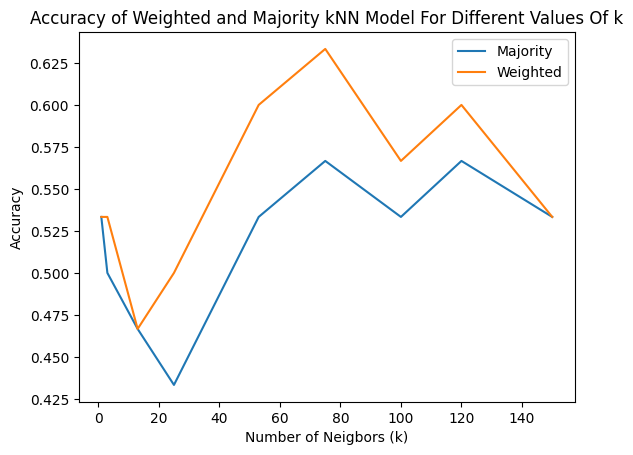

In [403]:
plt.plot(poss_k,acc_k_majority, label='Majority')
plt.plot(poss_k,acc_k_weighted,label='Weighted')
plt.xlabel('Number of Neigbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy of Weighted and Majority kNN Model For Different Values Of k')
plt.legend()
plt.show()